## Rainfall Weather Forecasting

#### Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
#### 1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


#### Dataset Description:

Number of columns: 23



Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


#### Dataset Link-  

•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv

•	https://github.com/dsrscientist/dataset3


In [1]:
# Import Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing DataSet

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


#### Statistical Exploration of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Comment :

We have observations 8425 row and 23 columns, dataset has mix of data types(float64,object).

In [4]:
# check if any duplicate entry or duplicate row with same value exist

df.duplicated().sum()

1663

In [5]:
# Let check how many question mark (" ?") inside dataset.

df.isin([' ?']).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [6]:
# Let check if any whitespace, 'NA' or '-' exist in dataset.

df.isin([' ','NA','-']).sum().any()

False

In [7]:
# Let drop duplicated entry from dataset before checking null values.

df.drop_duplicates(keep='last', inplace=True)

In [8]:
# Let replace ' ?' with np.NaN

df=df.replace(' ?',np.NaN)

In [9]:
df.shape

(6762, 23)

#### Missing value check

<Axes: >

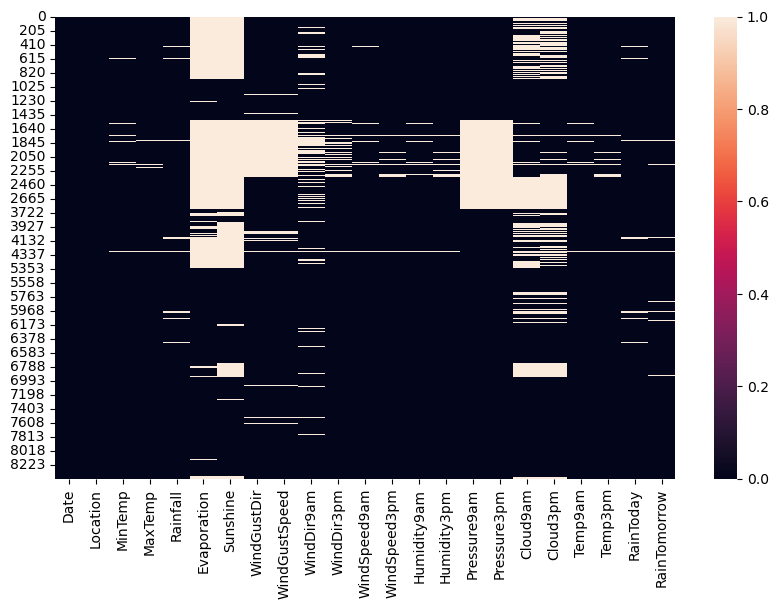

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [11]:
# Finding what percentage of data is missing from the dataset

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3236       47.855664
Evaporation              2921       43.197279
Cloud3pm                 1902       28.127773
Cloud9am                 1866       27.595386
Pressure3pm              1311       19.387755
Pressure9am              1308       19.343390
WindGustDir               942       13.930790
WindGustSpeed             942       13.930790
WindDir9am                794       11.742088
WindDir3pm                294        4.347826
Rainfall                  138        2.040816
RainToday                 138        2.040816
RainTomorrow              138        2.040816
WindSpeed3pm              100        1.478852
Humidity3pm                96        1.419698
Temp3pm                    92        1.360544
MinTemp                    70        1.035197
WindSpeed9am               63        0.931677
MaxTemp                    57        0.842946
Humidity9am                54        0.798580
Temp9am                    51     

In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Comment:

There are missing values in 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow' .

In [13]:
# Date convert in Day,Month,and Year

df['Date'] = pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [14]:
df.drop(['Date'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   object 
 1   MinTemp        6692 non-null   float64
 2   MaxTemp        6705 non-null   float64
 3   Rainfall       6624 non-null   float64
 4   Evaporation    3841 non-null   float64
 5   Sunshine       3526 non-null   float64
 6   WindGustDir    5820 non-null   object 
 7   WindGustSpeed  5820 non-null   float64
 8   WindDir9am     5968 non-null   object 
 9   WindDir3pm     6468 non-null   object 
 10  WindSpeed9am   6699 non-null   float64
 11  WindSpeed3pm   6662 non-null   float64
 12  Humidity9am    6708 non-null   float64
 13  Humidity3pm    6666 non-null   float64
 14  Pressure9am    5454 non-null   float64
 15  Pressure3pm    5451 non-null   float64
 16  Cloud9am       4896 non-null   float64
 17  Cloud3pm       4860 non-null   float64
 18  Temp9am 

Observation:

There are 6762 rows , 24 Independent columns and 1 Target feature.

In [17]:
# Separating numerical and categorical variable

Numerical=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
           'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm',
          'day','month','year']

Category=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

#### Missing value imputation

In [18]:
# Imputating Missing value with mode for categorical features

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [19]:
# Imputating Missing value with mean for categorical features

df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#### Missing Value Check After Imputataion

In [20]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Location                    0             0.0
Humidity3pm                 0             0.0
month                       0             0.0
day                         0             0.0
RainTomorrow                0             0.0
RainToday                   0             0.0
Temp3pm                     0             0.0
Temp9am                     0             0.0
Cloud3pm                    0             0.0
Cloud9am                    0             0.0
Pressure3pm                 0             0.0
Pressure9am                 0             0.0
Humidity9am                 0             0.0
MinTemp                     0             0.0
WindSpeed3pm                0             0.0
WindSpeed9am                0             0.0
WindDir3pm                  0             0.0
WindDir9am                  0             0.0
WindGustSpeed               0             0.0
WindGustDir                 0             0.0
Sunshine                    0     

Comment :

Finally, No Missing Value is Present.

In [21]:
# Statistical Matrix

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,day,month,year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,15.737208,6.462141,2012.052203
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845,8.793898,3.377471,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,8.000000,4.000000,2010.000000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


Observation:

The minimum and maximum MinTemp of Weather in the dataset is -2 and MaxTemp 45.5 respectively.

The minimum and maximum Rainfall is 0 and 371 respectively.



In [22]:
# Start Exploring categorial features with Enlisting Value counts & Sub-categories

for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
WindGustDir
E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64
WindDir9am
N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64
WindDir3pm
SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64
RainToday
No     5190


#### Exploratory Data Analysis(EDA)

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


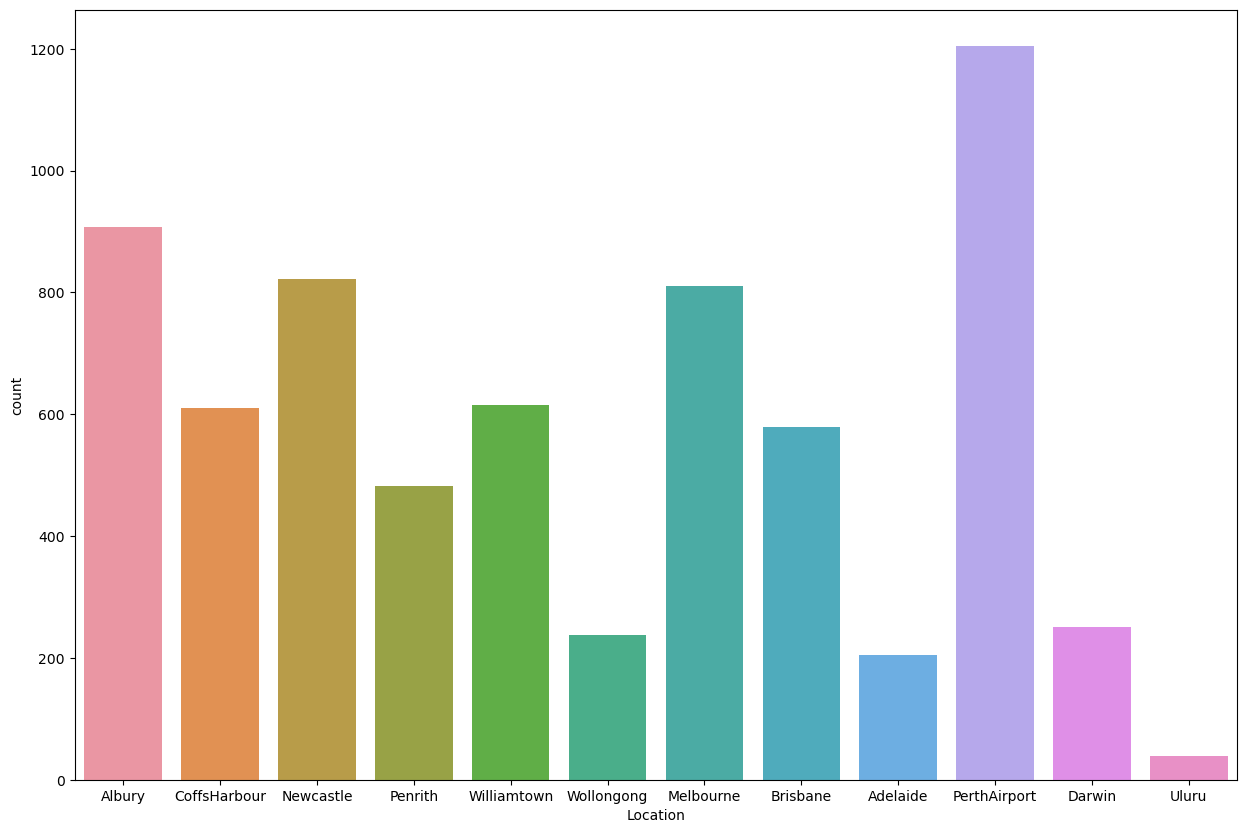

In [23]:
#  Exploration of Location

plt.figure(figsize=(15,10))
sns.countplot(x='Location',data=df)
print(df['Location'].value_counts())

Text(0.5, 1.0, 'mintemp vs location')

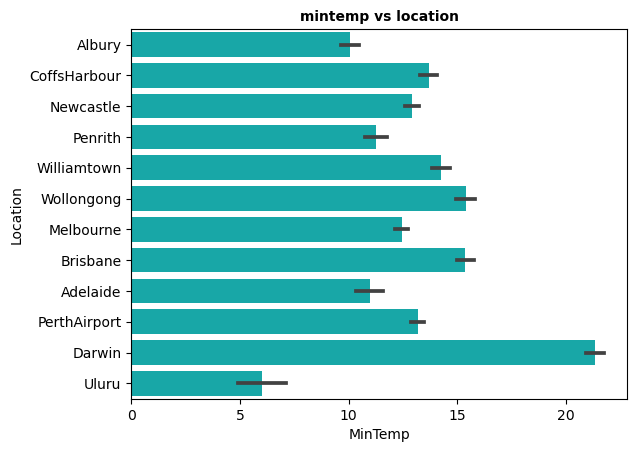

In [24]:
# Exploration of MinTemp

sns.barplot(x='MinTemp',y='Location',data=df,color='c')
plt.title("mintemp vs location",fontsize=10, fontweight='bold')

Text(0.5, 1.0, 'MaxTemp vs location')

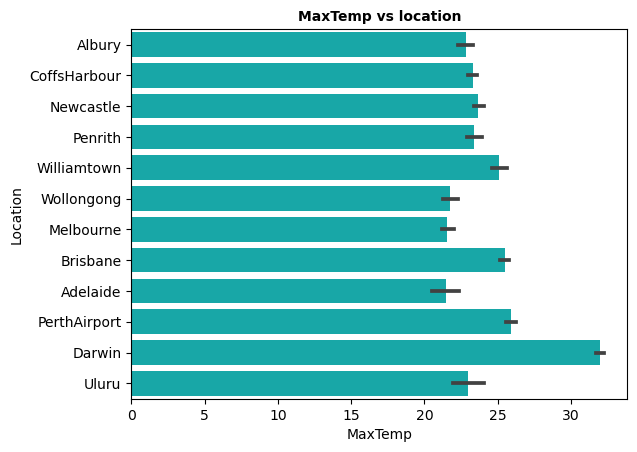

In [25]:
sns.barplot(x='MaxTemp',y='Location',data=df,color='c',ci=95)
plt.title("MaxTemp vs location",fontsize=10, fontweight='bold')

Text(0.5, 1.0, 'Rainfall vs location')

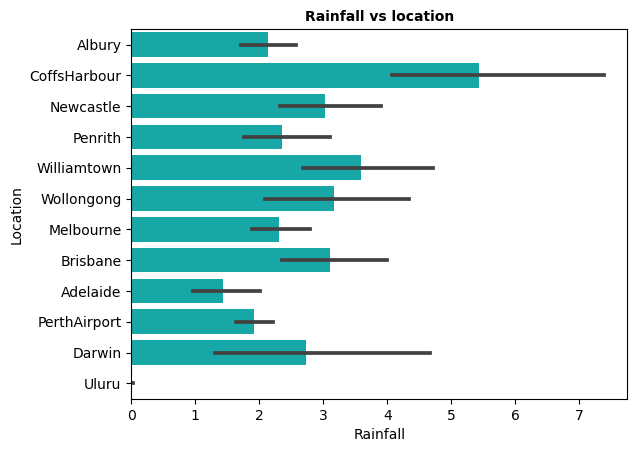

In [26]:
sns.barplot(x='Rainfall',y='Location',data=df,color='c',ci=95)
plt.title("Rainfall vs location",fontsize=10, fontweight='bold')

<Axes: xlabel='RainToday', ylabel='count'>

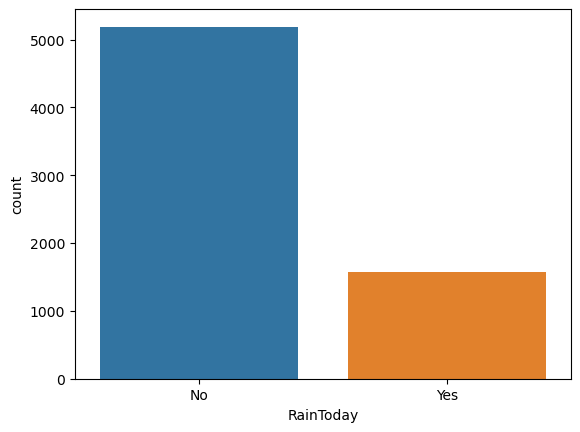

In [27]:
sns.countplot(x='RainToday',data=df)

<Axes: xlabel='RainTomorrow', ylabel='count'>

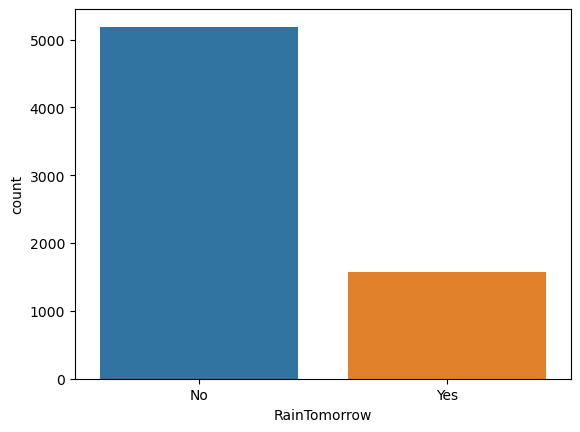

In [28]:
sns.countplot(x='RainTomorrow',data=df)

Text(0.5, 1.0, 'Rainfall VS Year')

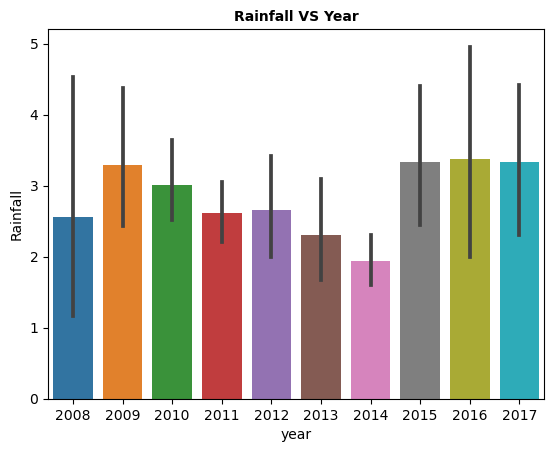

In [29]:
sns.barplot(y='Rainfall',x='year',data=df)
plt.title("Rainfall VS Year",fontsize=10, fontweight='bold')

Text(0.5, 1.0, 'rainfall vs year and location')

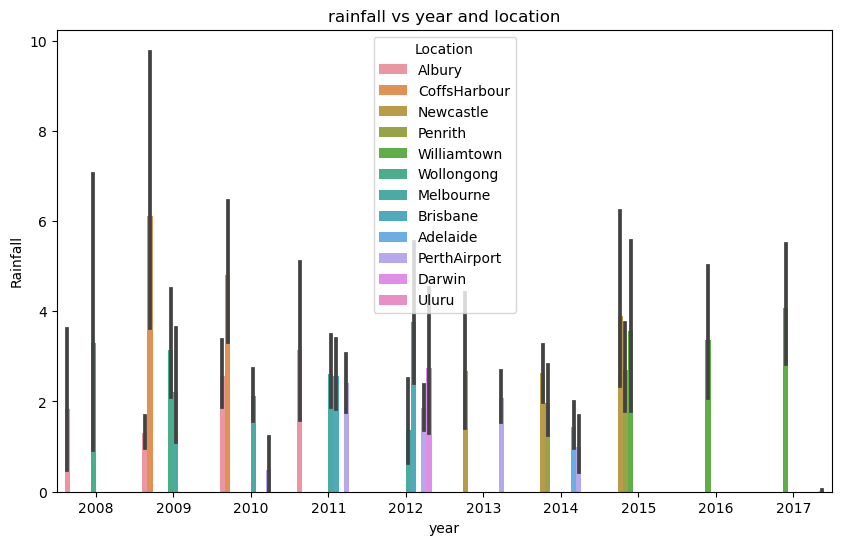

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(y='Rainfall',x='year',data=df,hue="Location")
plt.title("rainfall vs year and location")

#### Feature selection and Engineering

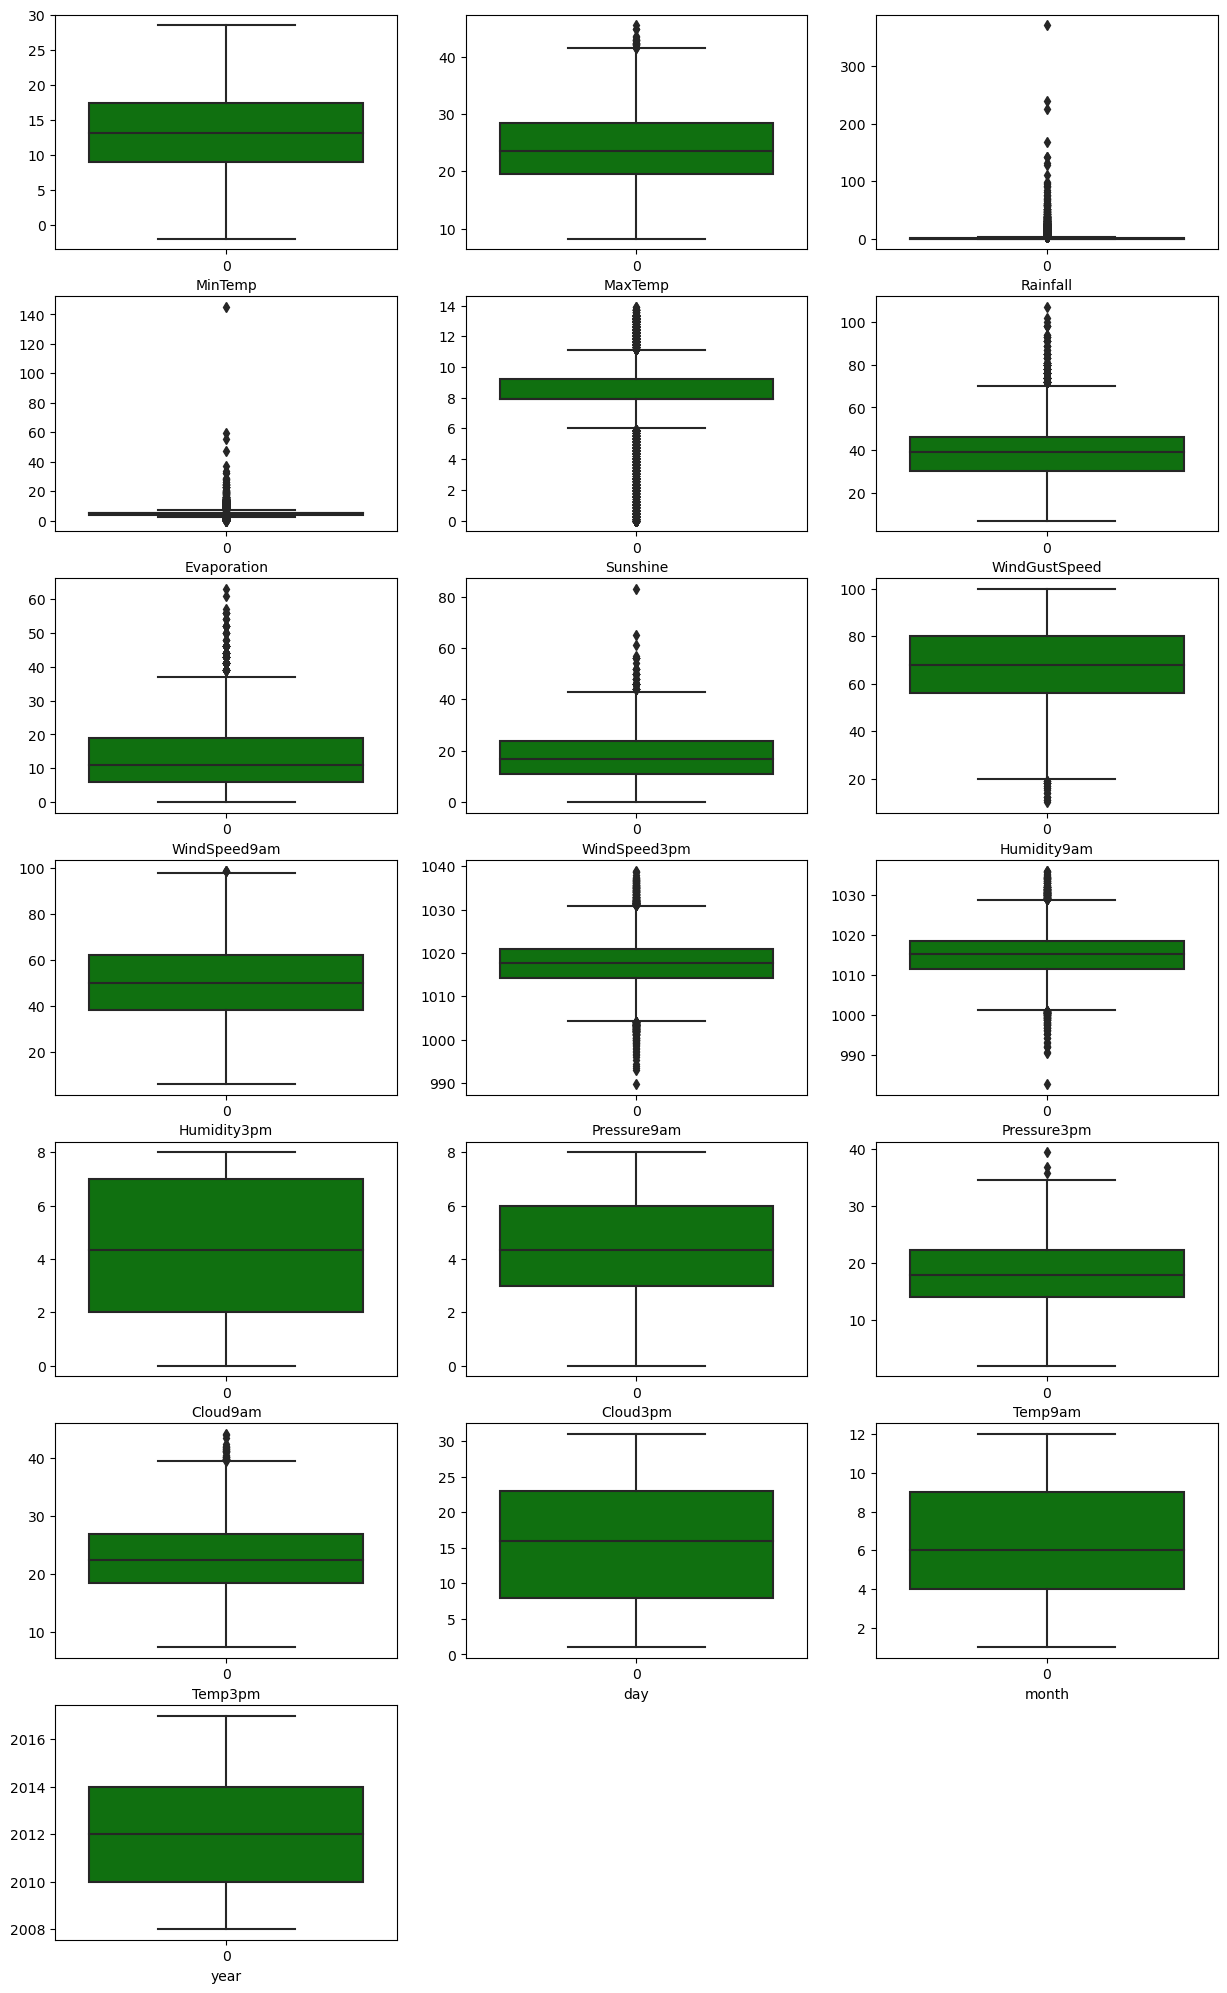

In [31]:
# Outliers Detection and Removal

plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=19:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [32]:
# Droping unnecessary columns

df.drop(['Location','WindDir9am','WindDir3pm','WindGustDir'], axis=1, inplace=True)

In [33]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,13.4,22.9,0.6,5.302395,7.890896,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.000000,4.320988,16.9,21.8,No,No,1,12,2008
1,7.4,25.1,0.0,5.302395,7.890896,44.0,4.0,22.0,44.0,25.0,...,1007.8,4.336806,4.320988,17.2,24.3,No,No,2,12,2008
2,12.9,25.7,0.0,5.302395,7.890896,46.0,19.0,26.0,38.0,30.0,...,1008.7,4.336806,2.000000,21.0,23.2,No,No,3,12,2008
3,9.2,28.0,0.0,5.302395,7.890896,24.0,11.0,9.0,45.0,16.0,...,1012.8,4.336806,4.320988,18.1,26.5,No,No,4,12,2008
4,17.5,32.3,1.0,5.302395,7.890896,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
df['RainToday'] = le.fit_transform(df['RainToday']) 

le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [36]:
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [37]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,13.4,22.9,0.6,5.302395,7.890896,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.000000,4.320988,16.9,21.8,0,0,1,12,2008
1,7.4,25.1,0.0,5.302395,7.890896,44.0,4.0,22.0,44.0,25.0,...,1007.8,4.336806,4.320988,17.2,24.3,0,0,2,12,2008
2,12.9,25.7,0.0,5.302395,7.890896,46.0,19.0,26.0,38.0,30.0,...,1008.7,4.336806,2.000000,21.0,23.2,0,0,3,12,2008
3,9.2,28.0,0.0,5.302395,7.890896,24.0,11.0,9.0,45.0,16.0,...,1012.8,4.336806,4.320988,18.1,26.5,0,0,4,12,2008
4,17.5,32.3,1.0,5.302395,7.890896,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6762 non-null   float64
 1   MaxTemp        6762 non-null   float64
 2   Rainfall       6762 non-null   float64
 3   Evaporation    6762 non-null   float64
 4   Sunshine       6762 non-null   float64
 5   WindGustSpeed  6762 non-null   float64
 6   WindSpeed9am   6762 non-null   float64
 7   WindSpeed3pm   6762 non-null   float64
 8   Humidity9am    6762 non-null   float64
 9   Humidity3pm    6762 non-null   float64
 10  Pressure9am    6762 non-null   float64
 11  Pressure3pm    6762 non-null   float64
 12  Cloud9am       6762 non-null   float64
 13  Cloud3pm       6762 non-null   float64
 14  Temp9am        6762 non-null   float64
 15  Temp3pm        6762 non-null   float64
 16  RainToday      6762 non-null   int32  
 17  RainTomorrow   6762 non-null   int32  
 18  day     

In [39]:
from scipy.stats import zscore

In [40]:
# Outliers removal using Zscore method

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (6762, 21)
Shape of the dataframe after removing outliers:  (6409, 21)
Percentage of data loss post outlier removal:  5.220349009168885


In [41]:
# Data Loss

print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((6762-6409)/6762)*100,'%')

Percentage Data Loss : 5.220349009168885 %


We are losing 5.22 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building. We have option to go for quantile method but by looking at boxplot we can say lower capping will result in useful data loss and eventually data loss will be more than zscore method.

In [42]:
df.skew()

MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustSpeed    0.477235
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
day              0.004771
month            0.032770
year             0.352924
dtype: float64

In [43]:
# Corrleation

df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
MinTemp,1.000000,0.730203,0.101291,0.365336,0.045007,0.243945,0.176198,0.195641,-0.149362,0.078620,...,-0.447642,0.095244,0.045078,0.892887,0.699067,0.072751,0.093202,0.018823,-0.235576,0.033619
MaxTemp,0.730203,1.000000,-0.137986,0.474225,0.358251,0.170578,0.062748,0.124107,-0.415573,-0.417667,...,-0.426387,-0.240845,-0.239589,0.865352,0.974864,-0.219715,-0.158541,0.020013,-0.173102,0.084633
Rainfall,0.101291,-0.137986,1.000000,-0.110626,-0.192806,0.095182,0.044468,0.032481,0.305620,0.302908,...,-0.056897,0.240989,0.198723,-0.029414,-0.147791,0.694824,0.277606,-0.006935,-0.001506,0.004145
Evaporation,0.365336,0.474225,-0.110626,1.000000,0.400577,0.222262,0.161102,0.121162,-0.341756,-0.255551,...,-0.306084,-0.119929,-0.166669,0.428227,0.462685,-0.178100,-0.108826,0.006043,-0.055007,0.112985
Sunshine,0.045007,0.358251,-0.192806,0.400577,1.000000,0.039776,0.028450,0.070767,-0.380990,-0.438800,...,-0.084864,-0.535310,-0.558181,0.242516,0.376674,-0.238391,-0.334757,-0.002603,0.001859,0.055028
WindGustSpeed,0.243945,0.170578,0.095182,0.222262,0.039776,1.000000,0.564923,0.613722,-0.272013,-0.102397,...,-0.327380,-0.001037,0.036077,0.224148,0.138991,0.077282,0.163628,-0.003702,0.049319,-0.014431
WindSpeed9am,0.176198,0.062748,0.044468,0.161102,0.028450,0.564923,1.000000,0.538551,-0.385820,-0.128921,...,-0.119636,-0.035101,0.000162,0.157965,0.050588,0.035896,0.043021,-0.012158,0.025346,-0.107862
WindSpeed3pm,0.195641,0.124107,0.032481,0.121162,0.070767,0.613722,0.538551,1.000000,-0.259252,-0.096138,...,-0.182020,-0.018703,-0.032503,0.217616,0.102118,0.015535,0.025175,-0.013533,0.053649,-0.087612
Humidity9am,-0.149362,-0.415573,0.305620,-0.341756,-0.380990,-0.272013,-0.385820,-0.259252,1.000000,0.633177,...,0.165836,0.417189,0.321970,-0.399785,-0.410954,0.372955,0.284159,0.008320,-0.096843,0.090108
Humidity3pm,0.078620,-0.417667,0.302908,-0.255551,-0.438800,-0.102397,-0.128921,-0.096138,0.633177,1.000000,...,0.058590,0.421843,0.454655,-0.122452,-0.487766,0.358138,0.464801,0.022474,-0.053188,-0.033379


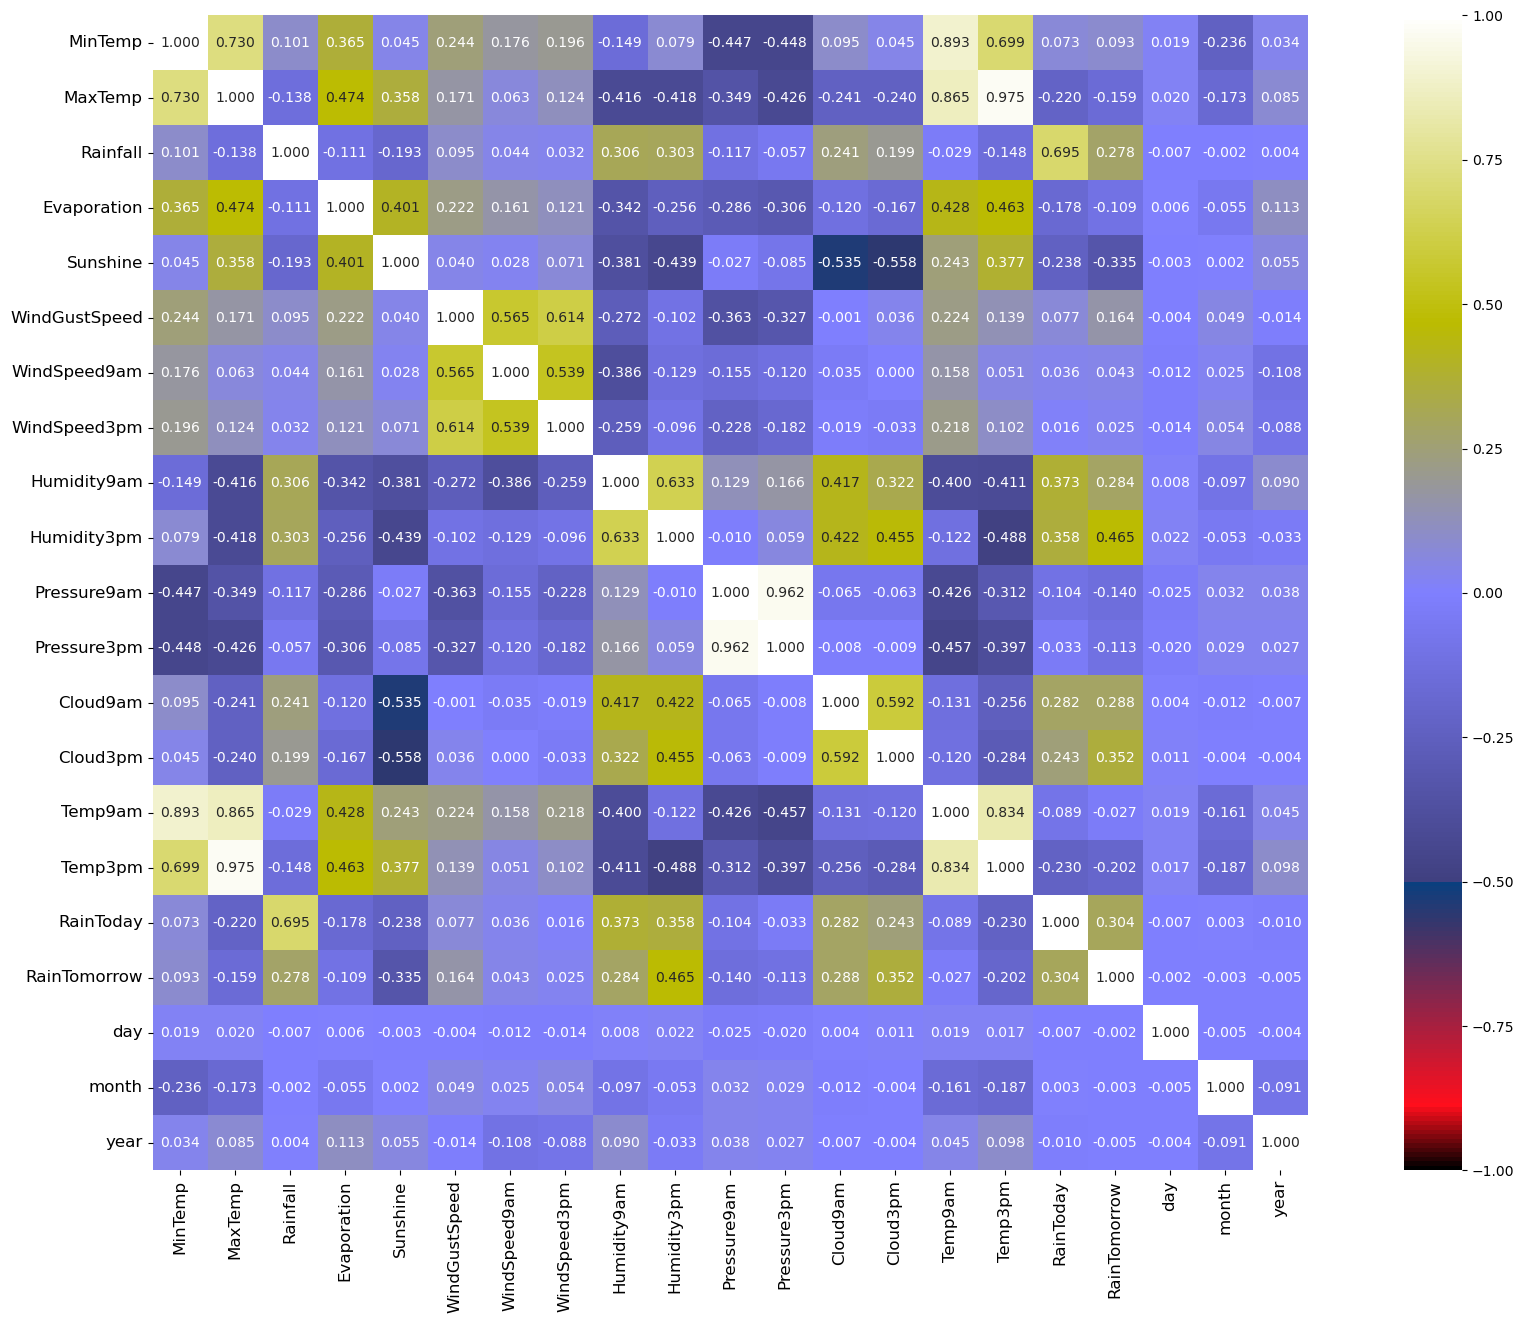

In [44]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Checking Multicollinearity between features using variance_inflation_factor


vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,58.908632,MinTemp
1,444.094217,MaxTemp
2,2.301924,Rainfall
3,10.227019,Evaporation
4,19.597079,Sunshine
5,23.223752,WindGustSpeed
6,5.523582,WindSpeed9am
7,8.630925,WindSpeed3pm
8,68.538233,Humidity9am
9,48.569334,Humidity3pm


In [47]:
# Balanceing Imbalanced target feature

df.RainTomorrow.value_counts()

0    4979
1    1430
Name: RainTomorrow, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

In [48]:
# Splitting data in target and dependent feature
X = df.drop(['RainTomorrow'], axis =1)
Y = df['RainTomorrow']

In [49]:
# Balancing using SMOTE

from imblearn.over_sampling import SMOTE

In [50]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [51]:
Y.value_counts()

0    4979
1    4979
Name: RainTomorrow, dtype: int64

We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

#### Standard Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

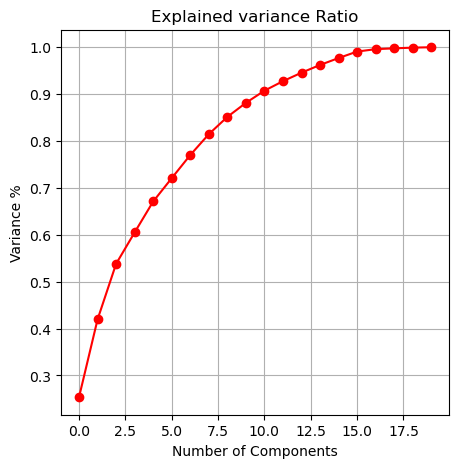

In [53]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [54]:
pca_new = PCA(n_components=17)
x_new = pca_new.fit_transform(X_scale)

In [55]:
principle_x=pd.DataFrame(x_new,columns=np.arange(17))

#### Machine Learning Model Building

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6970, 17)
Training target vector size: (6970,)
Test feature matrix size: (2988, 17)
Test target vector size: (2988,)


In [58]:
# Finding best Random state

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = .3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7938420348058902 on Random_state 31


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=31, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7938420348058902


Confusion matrix of Logistics Regression : 
 [[1176  286]
 [ 330 1196]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1462
           1       0.81      0.78      0.80      1526

    accuracy                           0.79      2988
   macro avg       0.79      0.79      0.79      2988
weighted avg       0.79      0.79      0.79      2988



#### Applying other classification algorithm

In [60]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7938420348058902


Confusion matrix : 
 [[1176  286]
 [ 330 1196]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1462
           1       0.81      0.78      0.80      1526

    accuracy                           0.79      2988
   macro avg       0.79      0.79      0.79      2988
weighted avg       0.79      0.79      0.79      2988



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8514056224899599


Confusion matrix : 
 [[1218  244]
 [ 200 1326]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1462
           1       0.84      0.87      0.86      1526

    accuracy                           0.85      2988
   macro avg       0.85      0.85      0.85      2988
weighted avg       0.85      0.85      0

#### CrossValidation :

In [61]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.70381526 0.67620482 0.71084337 0.78955299 0.80863887]
Mean Score : 0.737811063440099
Std deviation : 0.05171480617084261




Cross Validation Score SVC() :

Score : [0.66616466 0.62851406 0.72389558 0.8297338  0.80813661]
Mean Score : 0.7312889428129393
Std deviation : 0.0780454566118577




Cross Validation Score GaussianNB() :

Score : [0.71586345 0.68975904 0.68925703 0.75640382 0.78101457]
Mean Score : 0.726459580158908
Std deviation : 0.03665007902936288




Cross Validation Score DecisionTreeClassifier() :

Score : [0.68574297 0.61445783 0.73795181 0.78754395 0.80311401]
Mean Score : 0.7257621142530948
Std deviation : 0.06919403871652097




Cross Validation Score KNeighborsClassifier() :

Score : [0.65160643 0.61646586 0.70732932 0.7729784  0.79608237]
Mean Score : 0.708892475981273
Std deviation : 0.0686088878765541




Cross Validation Score RandomForestClassifier() :

Score : [0.76104418 0.70582329 0.7936747  0.87242

#### Hyper Parameter Tuning : GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]}

In [64]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter)
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]})

In [65]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 150}

#### Final Model

In [66]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 150, max_depth=30 ,min_samples_split= 3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8995983935742972


In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

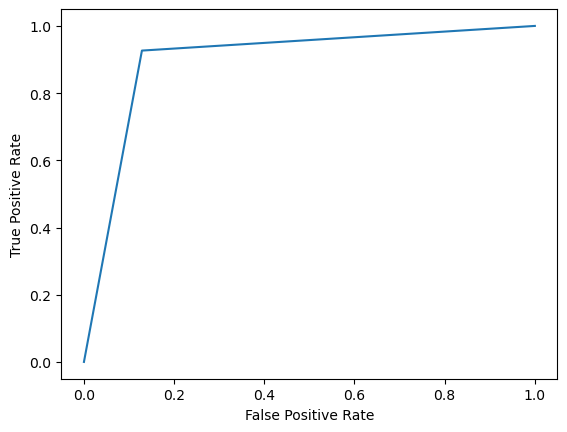

Auc Score :
 0.899007266657463


In [68]:
#define metrics
y_pred_proba = Final_mod.predict(X_test)
fpr,tpr,_ = roc_curve(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

Conclusion:

we had mix of columns like numeric and object type. Have checked numeric columns except MinTemp and MaxTemp, other columns were having min and other percentile score. we saw outlier also in these numeric columns. Outlier handled with ZScore .

we have done important analysis on categorical features with taregt variable 

As we seen that target class was imbalance data set,  imbalance problem was handled by up sampling with SMOTE algorithm.Model was trained on both the dataset, i got high accuracy with upsample data, thus have considered the same.

In [69]:
# Saving model

import joblib
joblib.dump(Final_mod,'Rainfall_Weather_Forecasting_Final.pkl')

['Rainfall_Weather_Forecasting_Final.pkl']